#Análise exploratória de dados
Conjunto de dados: `Palmer Penguins` (Pinguins de Palmer) <br>

-Autoras: <br>
Ana Luíza Gomes Vieira (analuizagv2000@gmail.com) <br>
Sarah Vitória Moreira de Aquino (sarahvitoriaaquino@gmail.com)<br>

-Data: <br>
Junho de 2025

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar dataset
df = pd.read_csv('https://raw.githubusercontent.com/ftorresd/OCEAN-datasets/main/penguins/penguins.csv')

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


/tmp/ipython-input-2139314476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=temp, x='sex', y='percent', palette='viridis')


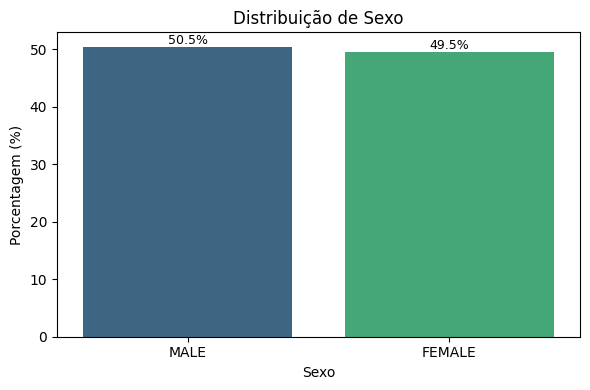

In [ ]:
temp = df['sex'].value_counts(normalize=True).reset_index()
temp.columns = ['sex', 'percent']
temp['percent'] *= 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=temp, x='sex', y='percent', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.title('Distribuição de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem (%)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-803663981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=temp, x='species', y='percent', palette='viridis')


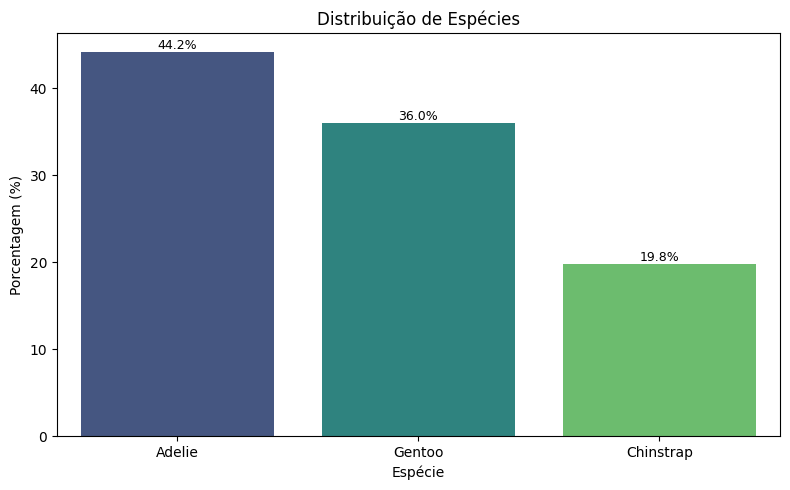

In [ ]:
temp = df['species'].value_counts(normalize=True).reset_index()
temp.columns = ['species', 'percent']
temp['percent'] *= 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=temp, x='species', y='percent', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.title('Distribuição de Espécies')
plt.xlabel('Espécie')
plt.ylabel('Porcentagem (%)')
plt.tight_layout()
plt.show()

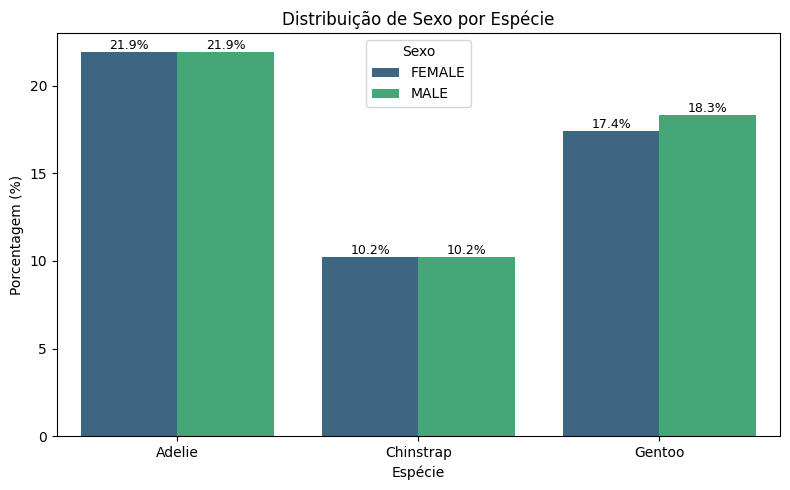

In [ ]:
temp = df.groupby(['species', 'sex']).size().reset_index(name='count')
total = temp['count'].sum()
temp['percent'] = temp['count'] / total * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=temp, x='species', y='percent', hue='sex', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.title('Distribuição de Sexo por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Porcentagem (%)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

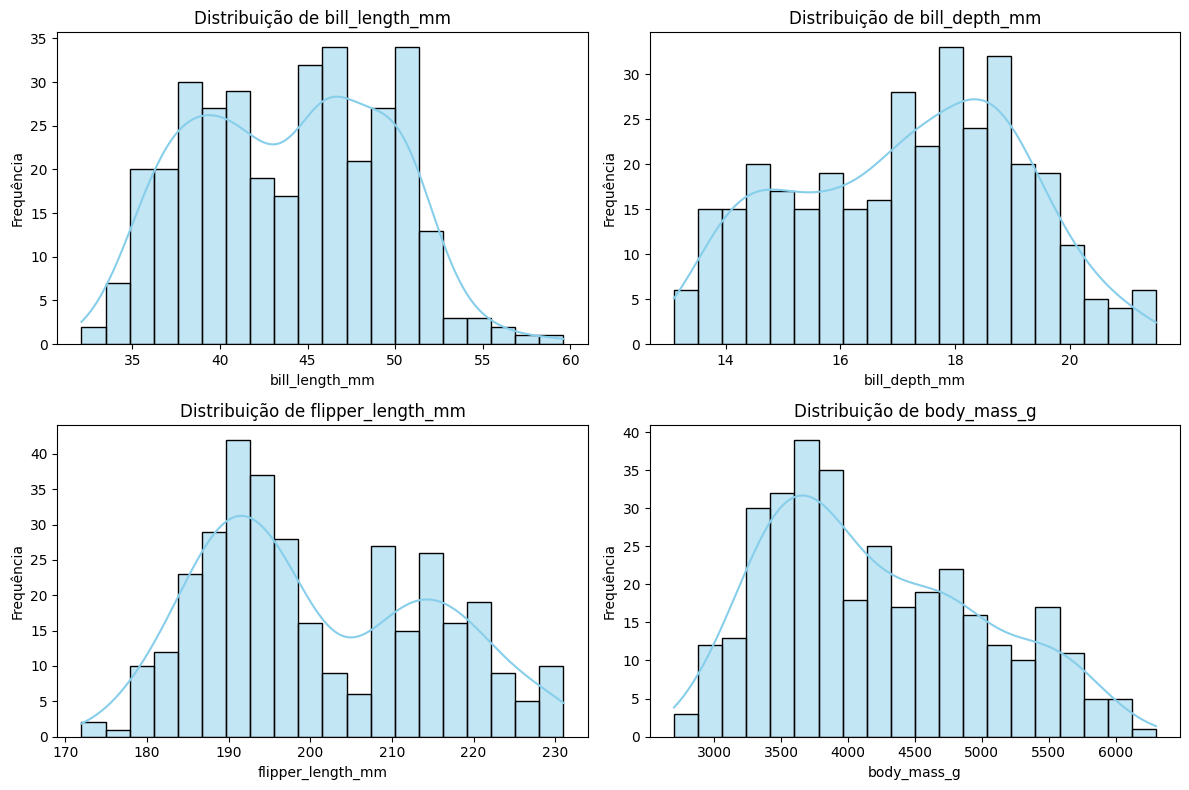

In [ ]:
atributos = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(12, 8))

for i, col in enumerate(atributos):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()




1.  bill_length_mm
- Distribuição: Levemente bimodal, com picos entre 40–45 mm e 47–50 mm.

- Dispersão: Moderada (DP ≈ 5.46 mm). Há uma boa variação, mas sem outliers extremos.

2.   bill_depth_mm

- Distribuição: Assimétrica à esquerda, mais concentrada entre 16 e 19 mm.

- Dispersão: Baixa (DP ≈ 1.97 mm). A maioria dos valores está próxima da média.

3.   flipper_length_mm

- Distribuição: Bimodal clara, indicando possível separação por espécie.

- Dispersão: Moderada (DP ≈ 14.06 mm). Boa separação de grupos.

4.   body_mass_g

- Distribuição: Assimétrica à direita, com cauda longa e leve platô  (área onde os dados se concentram de forma quase uniforme).

- Dispersão: Alta (DP ≈ 801.95 g). Indica ampla variação entre indivíduos.

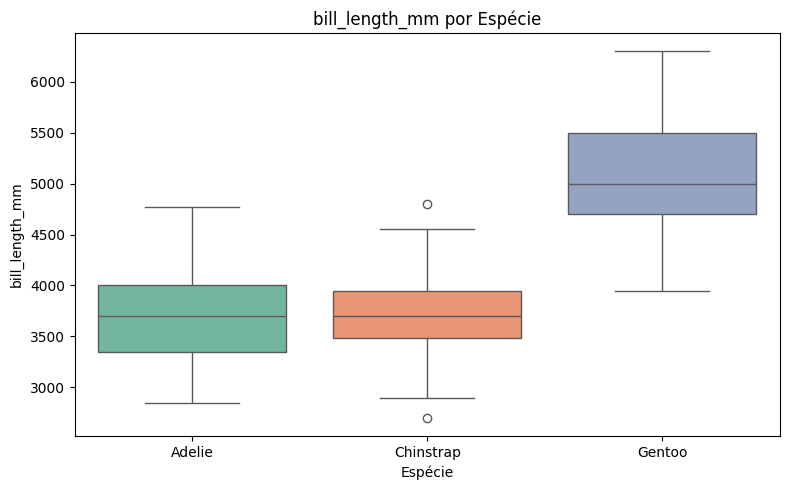

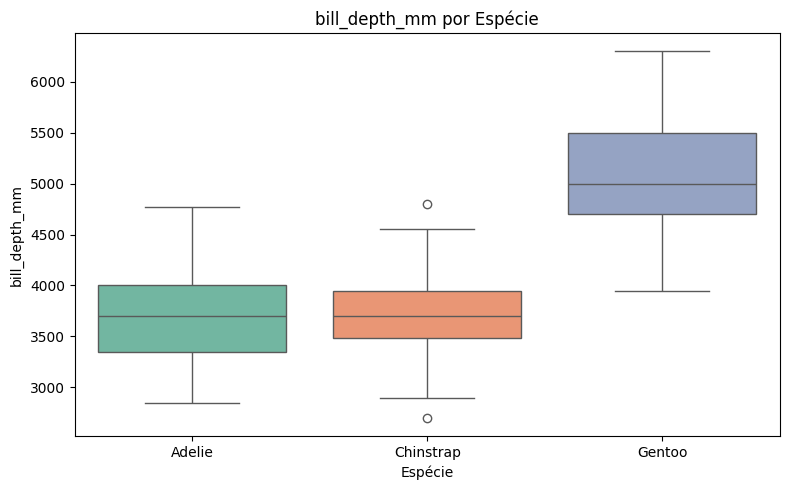

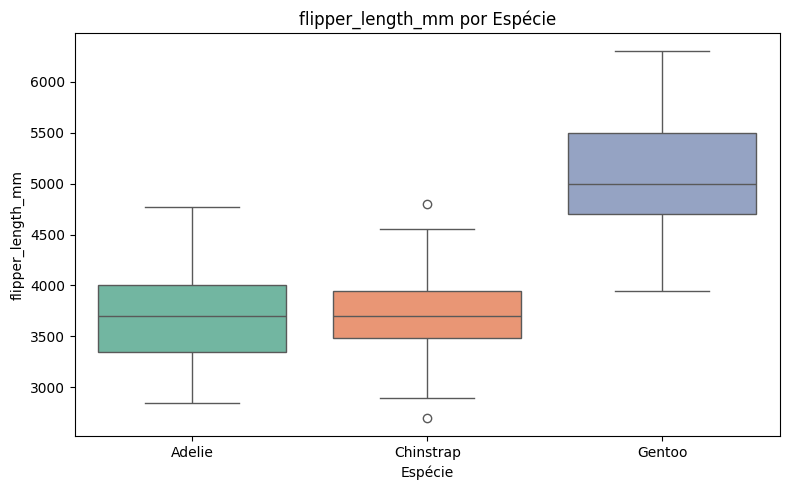

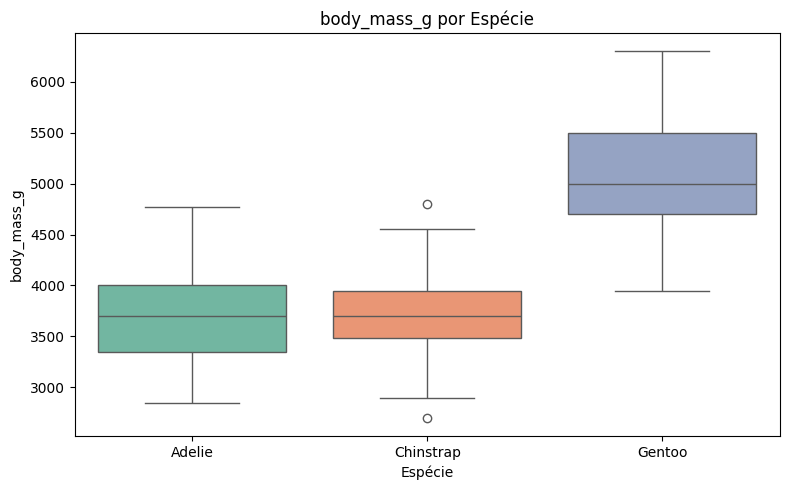

In [ ]:
#Análise de distribuição de flipper_length_mm e body_mass_g por Espécie
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='species', y='body_mass_g', hue='species', palette='Set2', legend=False)
    plt.title(f'{col} por Espécie')
    plt.ylabel(col)
    plt.xlabel('Espécie')
    plt.tight_layout()
    plt.show()


Análise das variáveis morfológicas por espécie

1. Comprimento da Nadadeira (`flipper_length_mm`)

- Adelie apresenta nadadeiras mais curtas, com mediana próxima de 190 mm e uma distribuição relativamente compacta. Há poucos outliers, principalmente abaixo de 175 mm.
- Chinstrap possui mediana um pouco maior, em torno de 195 mm, com maior dispersão e presença de valores mínimos semelhantes aos da espécie Adelie.
- Gentoo destaca-se por ter nadadeiras significativamente mais longas, com mediana em torno de 215 mm e distribuição concentrada no intervalo superior. A sobreposição com as outras espécies é mínima.

**Interpretação:** O comprimento da nadadeira é uma característica marcante entre as espécies, sendo útil tanto para classificação quanto para diferenciação morfológica. A imputação por espécie é recomendada para preservar essa estrutura.

---

2. Massa Corporal (`body_mass_g`)

- Adelie e Chinstrap apresentam medianas similares (~3700 g), mas com diferenças na dispersão. Adelie possui valores mais distribuídos, variando entre aproximadamente 2850 g e 4700 g.
- Chinstrap mostra leve compactação da distribuição, mas com mais outliers — principalmente abaixo de 3000 g e acima de 4700 g.
- Gentoo se diferencia claramente, com mediana por volta de 5000 g e uma faixa bem superior às outras espécies. Apresenta poucos outliers e maior uniformidade.

**Interpretação:** A variável `body_mass_g` evidencia diferenças fisiológicas significativas, especialmente da espécie Gentoo em relação às demais. A imputação por espécie é essencial para não mascarar essas variações reais.

---

3. Comprimento do Bico (`bill_length_mm`)

- Adelie tem valores médios mais baixos, com mediana entre 37 e 39 mm, e distribuição relativamente simétrica.
- Chinstrap apresenta mediana próxima de 45 mm, com ampla variação e valores mais altos que Adelie.
- Gentoo possui os maiores comprimentos de bico, com mediana acima de 48 mm, sem sobreposição com a distribuição inferior das outras espécies.

**Interpretação:** O comprimento do bico reflete variações morfológicas significativas entre as espécies, com separação clara entre os grupos. A imputação por espécie mantém essas distinções importantes.

---

4. Profundidade do Bico (`bill_depth_mm`)

- Adelie mostra valores mais concentrados, com mediana próxima de 18 mm e distribuição simétrica.
- Chinstrap tem distribuição semelhante, mas com mediana levemente menor (~17.5 mm) e maior dispersão.
- Gentoo exibe os menores valores médios de profundidade, com mediana próxima de 15 mm, invertendo o padrão observado nas outras variáveis.

**Interpretação:** Ao contrário de outras variáveis, a profundidade do bico é menor na espécie Gentoo, o que reforça a importância de considerar não só os valores absolutos, mas as proporções morfológicas. A imputação condicional por espécie continua sendo a melhor estratégia.


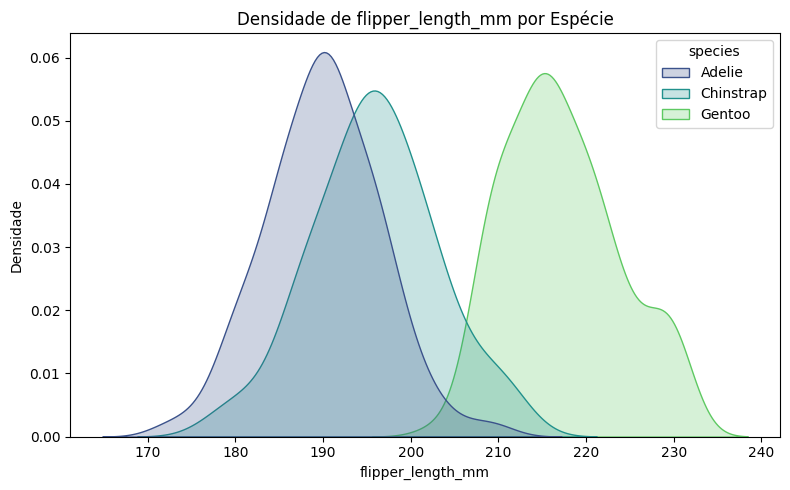

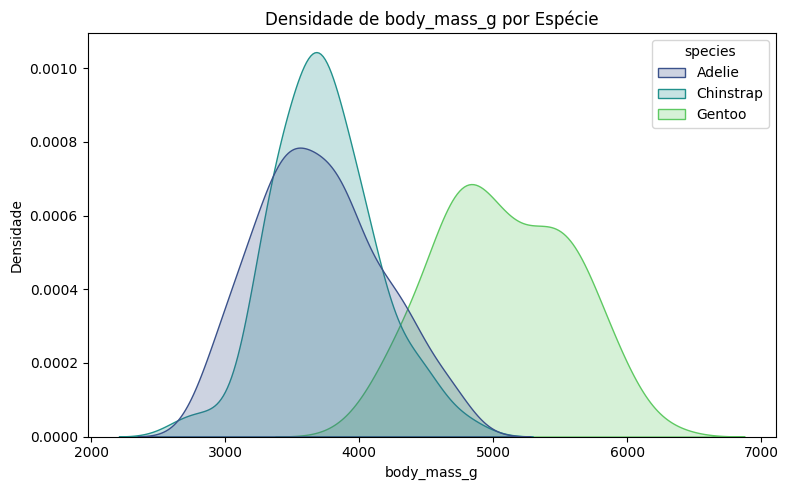

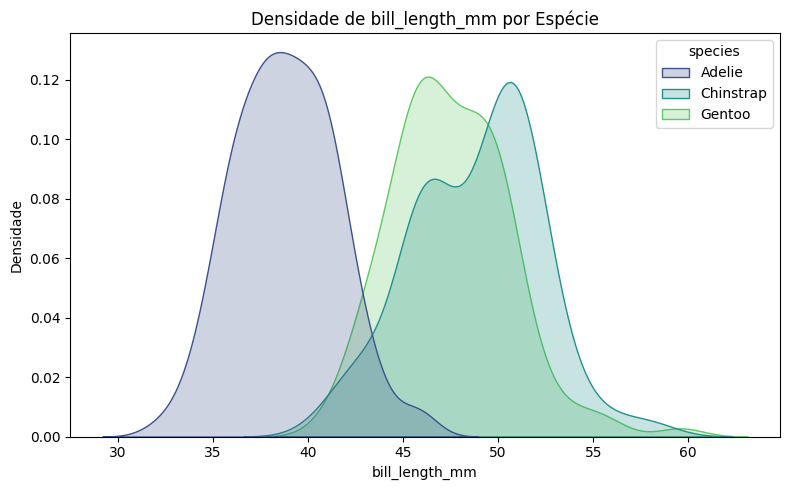

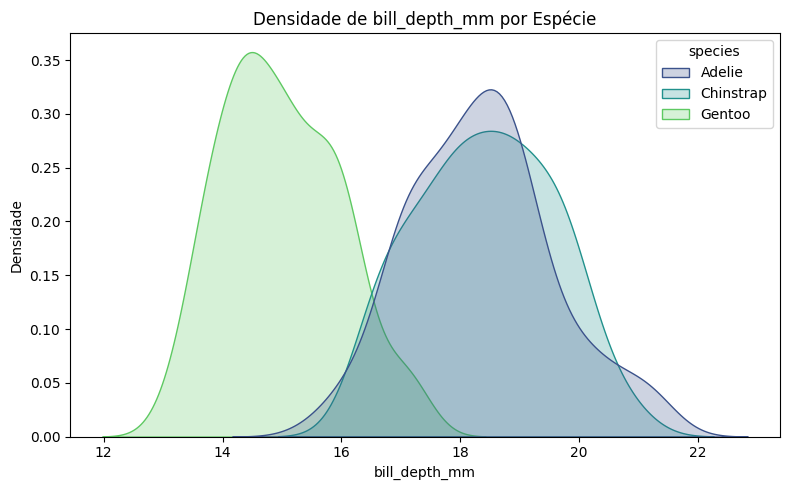

In [ ]:
#Análise de densidade de flipper_length_mm e body_mass_g por Espécie
variaveis = ['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm']

for var in variaveis:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=var, hue='species', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Densidade de {var} por Espécie')
    plt.ylabel('Densidade')
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

- **flipper_length_mm**: As espécies Adelie e Chinstrap apresentam valores muito próximos, com grande sobreposição na faixa de 185 mm a 205 mm. Já a espécie Gentoo se destaca com nadadeiras mais longas, situadas principalmente acima de 210 mm.

- **body_mass_g**: Também há sobreposição entre Adelie e Chinstrap, com densidades concentradas entre 3200 g e 4200 g. A Gentoo, por outro lado, exibe massas corporais mais elevadas, em torno de 5000 g, o que facilita sua diferenciação.

- **bill_length_mm**: A espécie Adelie tende a ter bicos mais curtos (entre 35 mm e 41 mm), enquanto Chinstrap e Gentoo possuem bicos mais longos. Nesse atributo, Adelie se destaca mais claramente das outras.

- **bill_depth_mm**: A Gentoo apresenta profundidades menores, entre 13 mm e 16 mm. Adelie e Chinstrap, no entanto, compartilham valores muito próximos, com forte sobreposição entre 17 mm e 20 mm.

De modo geral, a espécie **Gentoo** é a mais fácil de distinguir nos quatro atributos. Por outro lado, **Adelie e Chinstrap têm distribuições semelhantes**, o que torna a separação entre elas mais desafiadora com base em variáveis isoladas. Essa análise pode ser útil para orientar a criação de restrições específicas por espécie na geração de dados sintéticos.



Estatísticas para 'body_mass_g' por 'species':
              min     max         mean         std
species                                           
Adelie     2850.0  4775.0  3700.662252  458.566126
Chinstrap  2700.0  4800.0  3733.088235  384.335081
Gentoo     3950.0  6300.0  5076.016260  504.116237


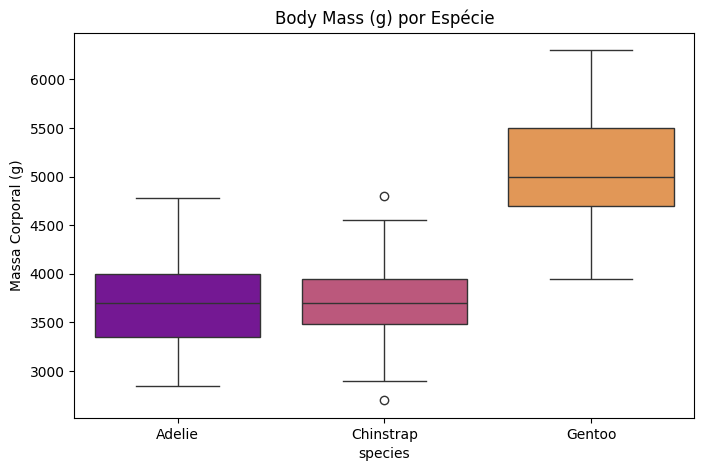

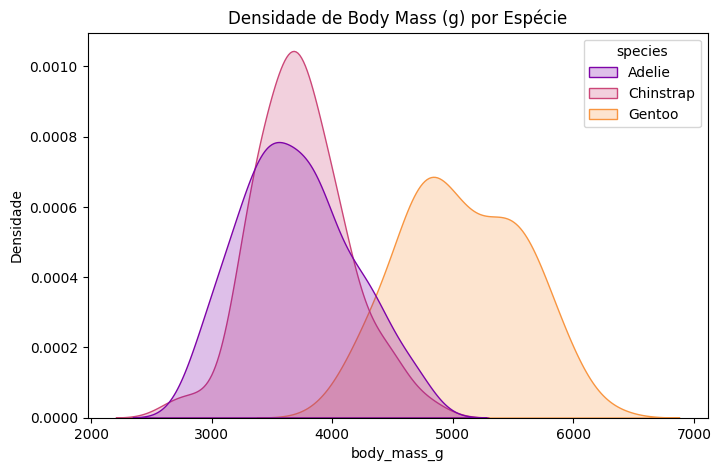

In [ ]:
#Análise para body_mass_g por species
print("\nEstatísticas para 'body_mass_g' por 'species':")
print(df.groupby('species')['body_mass_g'].agg(['min', 'max', 'mean', 'std']))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='species', palette='plasma', legend=False)
plt.title('Body Mass (g) por Espécie')
plt.ylabel('Massa Corporal (g)')
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='body_mass_g', hue='species', fill=True, common_norm=False, palette='plasma')
plt.title('Densidade de Body Mass (g) por Espécie')
plt.ylabel('Densidade')
plt.show()

3. Boxplot – Body Mass (g) por Espécie

Adelie:

Mediana próxima de 3700 g.

Apresenta outliers abaixo de 3000 g e acima de 4700 g.

Seu Intervalo Interquartil (IQR) é intermediário entre as espécies, e sua variação (DP ≈ 458.57 g) é maior que a do Chinstrap.

Distribuição relativamente simétrica, mas com cauda inferior levemente mais longa.

Chinstrap:

Mediana também por volta de 3700 g, muito próxima da do Adelie.

Apresenta mais outliers em ambas as extremidades, especialmente abaixo de 3000 g (mínimo de 2700 g).

Possui o Intervalo Interquartil (IQR) mais estreito e a menor dispersão (DP ≈ 384.33 g) entre as três espécies.

Caixas e bigodes sugerem uma leve assimetria negativa.

Gentoo:

Mediana elevada, em torno de 5000 g.

Maior amplitude de massa corporal (diferença entre max e min) entre as espécies.

Poucos outliers, indicando valores mais estáveis dentro de sua faixa maior.

Distribuição simétrica e bem definida, com uma dispersão (DP ≈ 504.12 g) que reflete sua maior escala de valores.

Conclusão: A espécie Gentoo tem claramente maior massa corporal média e amplitude. Adelie e Chinstrap são similares em mediana, mas o Chinstrap demonstra ser mais homogêneo e com menor variabilidade em relação ao Adelie. Isso indica que a massa corporal é um excelente indicador para distinguir o Gentoo das demais espécies.

4. KDE – Densidade de Body Mass (g) por Espécie
Adelie:

Pico de densidade em torno de 3700 g.

Curva moderadamente simétrica, com cauda levemente à esquerda.

A distribuição mostra uma concentração significativa de dados, mas é mais espalhada que a do Chinstrap.

Chinstrap:

Distribuição parecida com Adelie, mas visualmente mais achatada e espalhada que a do Adelie, apesar de seu menor DP (o que pode indicar que seus valores estão mais concentrados em menos categorias discretas, ou que o KDE smoothing está atuando diferente).

Pico também próximo de 3700 g, com sobreposição com Adelie.

Caudas mais longas, especialmente à esquerda.

Gentoo:

Curva bem separada, com pico entre 5000–5200 g.

Distribuição um pouco assimétrica à direita.

Ausência de sobreposição com outras espécies.

Conclusão: O gráfico de densidade reforça a separação clara da espécie Gentoo, que não se sobrepõe às demais. Já Adelie e Chinstrap têm sobreposição forte, sendo mais difíceis de distinguir com base apenas na massa, embora o Chinstrap seja estatisticamente mais concentrado (menor desvio padrão) que o Adelie.


Estatísticas para Proporção do Bico (length/depth) para a espécie Adelie:
count    151.000000
mean       2.119726
std        0.154594
min        1.639810
25%        2.011401
50%        2.136842
75%        2.238208
max        2.450000
Name: bill_ratio, dtype: float64


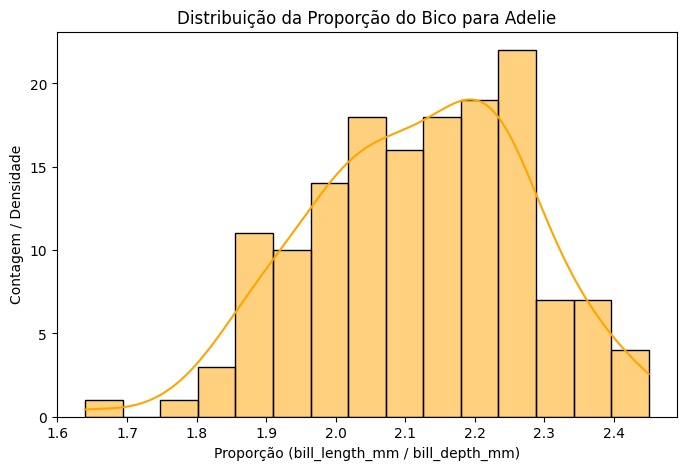

In [ ]:
# Análise para Proporção de Bico para Adelie
adelie_data_for_ratio = df[df['species'] == 'Adelie'].copy()
adelie_data_for_ratio = adelie_data_for_ratio.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
adelie_data_for_ratio = adelie_data_for_ratio[adelie_data_for_ratio['bill_depth_mm'] != 0]

adelie_data_for_ratio['bill_ratio'] = adelie_data_for_ratio['bill_length_mm'] / adelie_data_for_ratio['bill_depth_mm']

print("\nEstatísticas para Proporção do Bico (length/depth) para a espécie Adelie:")
print(adelie_data_for_ratio['bill_ratio'].describe())

plt.figure(figsize=(8, 5))
sns.histplot(data=adelie_data_for_ratio, x='bill_ratio', kde=True, bins=15, color='orange')
plt.title('Distribuição da Proporção do Bico para Adelie')
plt.xlabel('Proporção (bill_length_mm / bill_depth_mm)')
plt.ylabel('Contagem / Densidade')
plt.show()

5. Distribuição da Proporção do Bico para Adelie
A proporção avaliada foi: bill_length_mm / bill_depth_mm, apenas para a espécie Adelie.

A curva apresenta um formato assimétrico à esquerda, com cauda mais longa nos valores menores (ou à esquerda).
Correção: A imagem mostra claramente uma "cauda" mais alongada para o lado esquerdo (valores menores), e o pico está à direita dessa cauda. Isso é característica de uma assimetria negativa ou "à esquerda".

A maioria das proporções se concentra entre 1.9 e 2.3, com pico de densidade por volta de 2.2.
Esta parte está correta e alinhada com o gráfico.

A presença de uma cauda mais longa à esquerda sugere alguns indivíduos com bicos proporcionalmente menos alongados (ou seja, uma proporção menor entre comprimento e profundidade).
Correção: Se a cauda está nos valores menores, significa que há alguns indivíduos com proporções menores, não maiores.

Conclusão: A maioria dos pinguins Adelie apresenta uma proporção de bico dentro de um intervalo bem definido. Isso pode ser uma métrica útil para distinguir variações morfológicas dentro da espécie.


Estatísticas para 'bill_depth_mm' por 'sex':
         min   max       mean       std
sex                                    
FEMALE  13.1  20.7  16.425455  1.795681
MALE    14.1  21.5  17.891071  1.863351


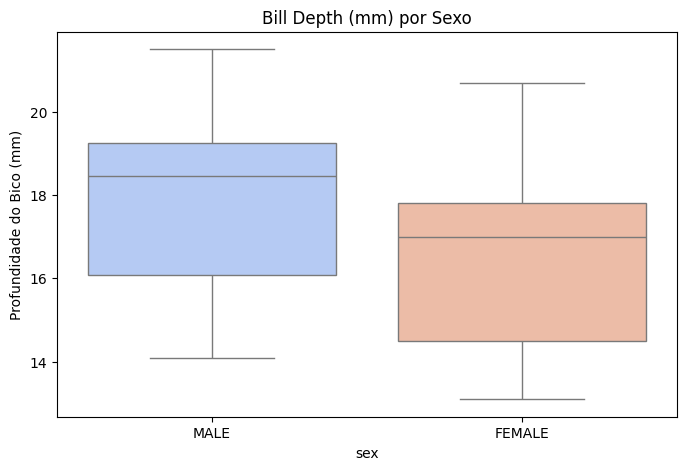

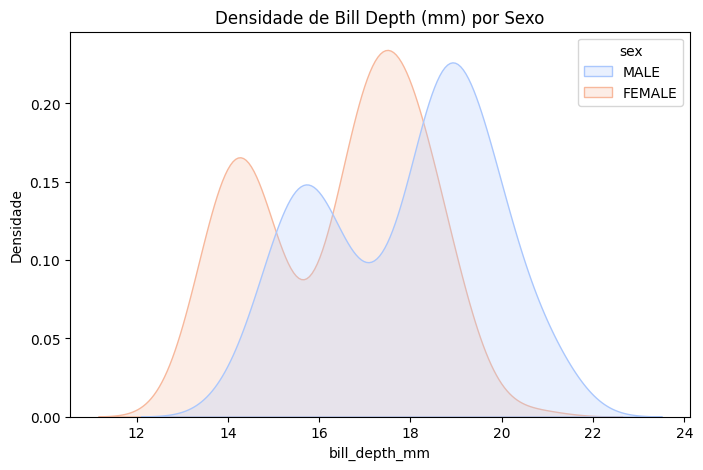

In [ ]:
#Análise para bill_depth_mm por sex
print("\nEstatísticas para 'bill_depth_mm' por 'sex':")
print(df.groupby('sex')['bill_depth_mm'].agg(['min', 'max', 'mean', 'std']))

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sex', y='bill_depth_mm', hue='sex', palette='coolwarm', legend=False)
plt.title('Bill Depth (mm) por Sexo')
plt.ylabel('Profundidade do Bico (mm)')
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='bill_depth_mm', hue='sex', fill=True, common_norm=False, palette='coolwarm')
plt.title('Densidade de Bill Depth (mm) por Sexo')
plt.ylabel('Densidade')
plt.show()

6. Boxplot – Bill Depth (mm) por Sexo

MACHO (MALE):

Mediana da profundidade do bico está em torno de 18.5 mm.

Distribuição mais concentrada entre 17 e 20 mm.

Poucos outliers.

Leve assimetria negativa.

FÊMEA (FEMALE):

Mediana mais baixa, cerca de 17 mm.

Apresenta uma distribuição com variação ligeiramente menor que a masculina.

Ampla sobreposição com os valores masculinos.

Conclusão: Os machos tendem a ter profundidade de bico ligeiramente maior que as fêmeas, mas há grande sobreposição. O boxplot evidencia uma diferença sutil, mas não absoluta, entre os sexos.

7. KDE – Densidade de Bill Depth (mm) por Sexo
MACHO (MALE):

Duas elevações distintas na curva: uma próxima de 15.5 mm e outra em 18.5 mm, sugerindo distribuição bimodal.

Pico principal em torno de 18.5 mm.

FÊMEA (FEMALE):

Também apresenta dois picos, mas deslocados para valores mais baixos.

Densidade concentrada entre 14 e 18 mm.

Conclusão: A bimodalidade observada pode indicar a presença de subgrupos dentro de cada sexo ou variabilidade populacional. Em geral, os machos têm bicos mais profundos que as fêmeas, mas a separação não é nítida, dada a significativa sobreposição entre suas distribuições.

###Resumo
- Gentoo se destaca por nadadeiras longas, maior massa e bico raso.
- Adelie e Chinstrap têm perfis semelhantes, com sobreposição em várias variáveis.